In [51]:
import pandas as pd
import numpy as np

In [224]:
pd.set_option('display.float_format',lambda x:'%.2f'%x)

In [225]:
somon = pd.read_excel('somontjhouses_sawei.xlsx')

In [226]:
somon.head()

,city,rooms,floor,area,location,cost,Unnamed: 6
0,Турсунзаде,3-комн. квартира,3 этаж,85.00,4,350000,NaN
1,Худжанд,4-комн. квартира,3 этаж,81.00,8,450000,NaN
2,Худжанд,4-комн. квартира,1 этаж,85.00,8,470000,NaN
3,Худжанд,4-комн. квартира,1 этаж,85.00,8,47000,NaN
4,Худжанд,1-комн. квартира,2 этаж,43.00,13,245000,NaN


In [227]:
somon.drop(columns=['Unnamed: 6'], inplace=True)

In [228]:
somon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10355 entries, 0 to 10354
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      10355 non-null  object 
 1   rooms     10355 non-null  object 
 2   floor     10353 non-null  object 
 3   area      10230 non-null  float64
 4   location  9648 non-null   object 
 5   cost      10355 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 485.5+ KB


In [229]:
somon.describe()

,area,cost
count,10230.00,10355.00
mean,71.82,452415.52
std,196.79,1731208.40
min,1.00,1.00
25%,48.00,240000.00
50%,60.00,350000.00
75%,78.00,500489.50
max,9999.00,125902260.00


In [230]:
somon.isnull().sum()

city          0
rooms         0
floor         2
area        125
location    707
cost          0
dtype: int64

In [231]:
somon['rooms'].unique()

array(['3-комн. квартира', '4-комн. квартира', '1-комн. квартира',
       '2-комн. квартира', '5-комн. квартира', '6-комн. квартира',
       '3-комн. дом', '2-квартира', '3 комн.квартира', '3 комн. квартира',
       '2 комн. квартира', '8-комн. квартира', '4 комн. квартира',
       '2-комн. дом', '4-комн. дом', '7-комн. квартира',
       '2-комн. квартиры'], dtype=object)

In [232]:
somon['room_num'] = somon['rooms'].str.split('-', expand=True)[0]

In [233]:
somon['rooms']

0        3-комн. квартира
1        4-комн. квартира
2        4-комн. квартира
3        4-комн. квартира
4        1-комн. квартира
               ...       
10350    2-комн. квартира
10351    3-комн. квартира
10352    1-комн. квартира
10353    2-комн. квартира
10354    5-комн. квартира
Name: rooms, Length: 10355, dtype: object

In [234]:
somon['room_num'].unique()

array(['3', '4', '1', '2', '5', '6', '3 комн.квартира',
       '3 комн. квартира', '2 комн. квартира', '8', '4 комн. квартира',
       '7'], dtype=object)

In [235]:
somon['room_num'] = somon['room_num'].str.split(' ', expand=True)[0]

In [236]:
somon.head()

,city,rooms,floor,area,location,cost,room_num
0,Турсунзаде,3-комн. квартира,3 этаж,85.00,4,350000,3
1,Худжанд,4-комн. квартира,3 этаж,81.00,8,450000,4
2,Худжанд,4-комн. квартира,1 этаж,85.00,8,470000,4
3,Худжанд,4-комн. квартира,1 этаж,85.00,8,47000,4
4,Худжанд,1-комн. квартира,2 этаж,43.00,13,245000,1


In [237]:
somon['room_num'].unique()

array(['3', '4', '1', '2', '5', '6', '8', '7'], dtype=object)

In [238]:
somon['room_num'].isnull().sum()

0

In [239]:
somon['rooms'].unique()

array(['3-комн. квартира', '4-комн. квартира', '1-комн. квартира',
       '2-комн. квартира', '5-комн. квартира', '6-комн. квартира',
       '3-комн. дом', '2-квартира', '3 комн.квартира', '3 комн. квартира',
       '2 комн. квартира', '8-комн. квартира', '4 комн. квартира',
       '2-комн. дом', '4-комн. дом', '7-комн. квартира',
       '2-комн. квартиры'], dtype=object)

In [240]:
somon.loc[somon['rooms'].str.contains('квартира'), 'isflat'] = 1
somon.loc[somon['rooms'].str.contains('квартиры'), 'isflat'] = 1
somon.loc[somon['rooms'].str.contains('дом'), 'isflat'] = 0

In [241]:
# somon['isflat'] = somon['isflat'].fillna(0)

In [242]:
somon.head()

,city,rooms,floor,area,location,cost,room_num,isflat
0,Турсунзаде,3-комн. квартира,3 этаж,85.00,4,350000,3,1.00
1,Худжанд,4-комн. квартира,3 этаж,81.00,8,450000,4,1.00
2,Худжанд,4-комн. квартира,1 этаж,85.00,8,470000,4,1.00
3,Худжанд,4-комн. квартира,1 этаж,85.00,8,47000,4,1.00
4,Худжанд,1-комн. квартира,2 этаж,43.00,13,245000,1,1.00


In [243]:
somon.floor.unique()

array([' 3 этаж', ' 1 этаж', ' 2 этаж', ' Цокольный этаж', ' 4 этаж',
       ' 5 этаж', ' 7 этаж', ' 6 этаж', ' 10 этаж', ' 9 этаж', ' 8 этаж',
       ' 11 этаж', ' 12 этаж', ' 18 этаж', ' 14 этаж', ' 13 этаж',
       ' 15 этаж', ' 16 этаж', nan, ' 23 этаж', ' 20 этаж', ' 17 этаж',
       ' 19 этаж', ' 22 этаж', ' 24 этаж', ' 3 сотки'], dtype=object)

In [248]:
somon.loc[somon.floor.isnull()]

,city,rooms,floor,area,location,cost,room_num,isflat


In [245]:
somon.drop(index=2603, inplace=True) # one flat has a missing value in column floor. let's drop it

In [246]:
somon.floor = somon.floor.fillna('1 этаж') # the house has been automatically given 1 

In [249]:
somon.floor.unique()

array([' 3 этаж', ' 1 этаж', ' 2 этаж', ' Цокольный этаж', ' 4 этаж',
       ' 5 этаж', ' 7 этаж', ' 6 этаж', ' 10 этаж', ' 9 этаж', ' 8 этаж',
       ' 11 этаж', ' 12 этаж', ' 18 этаж', ' 14 этаж', ' 13 этаж',
       ' 15 этаж', ' 16 этаж', '1 этаж', ' 23 этаж', ' 20 этаж',
       ' 17 этаж', ' 19 этаж', ' 22 этаж', ' 24 этаж', ' 3 сотки'],
      dtype=object)

In [250]:
# removed the values, so it gives an error

somon['floor'].str.strip().str.split(' ', expand=True)[1].unique()  

array(['этаж', 'сотки'], dtype=object)

#### 2 houses are actually flats
### the houses floor column is filled as "sotik"

In [257]:
somon.loc[somon['isflat'] == 0]

,city,rooms,floor,area,location,cost,room_num,isflat


In [252]:
somon.iloc[7241, somon.columns.get_loc('isflat')] = 1

In [253]:
somon.at[7241, 'isflat'] = 1

In [254]:
somon.at[1695, 'isflat'] = 1

In [258]:
somon.isflat.value_counts()

1.00    10353
Name: isflat, dtype: int64

In [256]:
somon.drop(index=8441, inplace=True)

- houses in floor column labeled as 'sotik'
- 2 houses are actually flats
- as there is only one house, I have decided to drop it. It Won't influence on statistics

In [263]:
somon.floor.unique()

array(['3', '1', '2', 0, '4', '5', '7', '6', '10', '9', '8', '11', '12',
       '18', '14', '13', '15', '16', '23', '20', '17', '19', '22', '24'],
      dtype=object)

In [260]:
somon.floor = somon.floor.str.strip().str.split(' ', expand=True)[0]

In [261]:
somon.at[list(somon.loc[somon['floor'] == 'Цокольный'].index), 'floor'] = 0

In [262]:
somon.head()

,city,rooms,floor,area,location,cost,room_num,isflat
0,Турсунзаде,3-комн. квартира,3,85.00,4,350000,3,1.00
1,Худжанд,4-комн. квартира,3,81.00,8,450000,4,1.00
2,Худжанд,4-комн. квартира,1,85.00,8,470000,4,1.00
3,Худжанд,4-комн. квартира,1,85.00,8,47000,4,1.00
4,Худжанд,1-комн. квартира,2,43.00,13,245000,1,1.00


In [264]:
somon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10353 entries, 0 to 10354
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      10353 non-null  object 
 1   rooms     10353 non-null  object 
 2   floor     10353 non-null  object 
 3   area      10229 non-null  float64
 4   location  9646 non-null   object 
 5   cost      10353 non-null  int64  
 6   room_num  10353 non-null  object 
 7   isflat    10353 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 986.0+ KB


In [265]:
somon.rename(columns={'room_num':'flat_room_numb'}, inplace=True)

In [266]:
somon.flat_room_numb=somon.flat_room_numb.astype('int64')
somon.isflat=somon.isflat.astype('int64')

In [267]:
somon.loc[(somon['city'] != 'Худжанд') & 
           (somon['city'] != 'Душанбе') &
           (somon['city'] != 'Куляб') &
           (somon['city'] != 'Bokhtar') , 'city'] = 'Else'

In [268]:
somon.loc[somon['city']=='Худжанд', 'city'] = 'Khudjand'
somon.loc[somon['city']=='Душанбе', 'city'] = 'Dushanbe'
somon.loc[somon['city']=='Куляб', 'city'] = 'Kulyab'


In [269]:
somon.city.unique()

array(['Else', 'Khudjand', 'Dushanbe', 'Kulyab'], dtype=object)

#### Dealing with area NA

In [ ]:
somon['area_mean'] = somon.groupby(['city','flat_room_numb']).area.transform('mean')

In [272]:
somon.area.fillna(somon['area_mean'], inplace=True)

Dealing with location NA:
- location column contain a mixture of multiple types, as well as NA
- Due to a huge mess and a lack of patterns of filling NA, I have decided to fill NA with 0 (unknown location)
- The str & datetime types: been replaced with random.randint between 0 & 112

In [360]:
somon.isnull().sum()

city              0
rooms             0
floor             0
area              0
location          0
cost              0
flat_room_numb    0
isflat            0
area_mean         0
location_type     0
dtype: int64

In [301]:
somon.location.fillna(0,inplace=True) # 0 - unknown locations

In [364]:
somon['location_type'] = somon['location'].apply(lambda x: type(x).__name__)

In [365]:
somon.location_type.value_counts()

str         9557
int          791
datetime       5
Name: location_type, dtype: int64

In [367]:
import random

somon.loc[somon['location_type'] == 'str', 'location'] = random.randint(0,112)
somon.loc[somon['location_type'] == 'datetime', 'location'] = random.randint(0,112)

In [368]:
somon['location_type'] = somon['location'].apply(lambda x: type(x).__name__)
somon.location_type.value_counts()

int    10353
Name: location_type, dtype: int64

# 

In [370]:
somon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10353 entries, 0 to 10354
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10353 non-null  object 
 1   rooms           10353 non-null  object 
 2   floor           10353 non-null  object 
 3   area            10353 non-null  float64
 4   location        10353 non-null  object 
 5   cost            10353 non-null  int64  
 6   flat_room_numb  10353 non-null  int64  
 7   isflat          10353 non-null  int64  
 8   area_mean       10353 non-null  float64
 9   location_type   10353 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 1.1+ MB


In [371]:
somon.head()

,city,rooms,floor,area,location,cost,flat_room_numb,isflat,area_mean,location_type
0,Else,3-комн. квартира,3,85.00,4,350000,3,1,72.14,int
1,Khudjand,4-комн. квартира,3,81.00,8,450000,4,1,89.48,int
2,Khudjand,4-комн. квартира,1,85.00,8,470000,4,1,89.48,int
3,Khudjand,4-комн. квартира,1,85.00,8,47000,4,1,89.48,int
4,Khudjand,1-комн. квартира,2,43.00,13,245000,1,1,41.36,int


In [372]:
somon.drop(columns=['rooms','isflat','location_type'], inplace=True)

In [373]:
somon.head()

,city,floor,area,location,cost,flat_room_numb,area_mean
0,Else,3,85.00,4,350000,3,72.14
1,Khudjand,3,81.00,8,450000,4,89.48
2,Khudjand,1,85.00,8,470000,4,89.48
3,Khudjand,1,85.00,8,47000,4,89.48
4,Khudjand,2,43.00,13,245000,1,41.36


In [374]:
somon.drop(columns=['area_mean'], inplace=True)

In [375]:
somon.head()

,city,floor,area,location,cost,flat_room_numb
0,Else,3,85.00,4,350000,3
1,Khudjand,3,81.00,8,450000,4
2,Khudjand,1,85.00,8,470000,4
3,Khudjand,1,85.00,8,47000,4
4,Khudjand,2,43.00,13,245000,1


### Encoding the city column

In [382]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
somon['city'] = le.fit_transform(somon['city']) 

In [383]:
somon

,city,floor,area,location,cost,flat_room_numb
0,1,3,85.00,4,350000,3
1,2,3,81.00,8,450000,4
2,2,1,85.00,8,470000,4
3,2,1,85.00,8,47000,4
4,2,2,43.00,13,245000,1
...,...,...,...,...,...,...
10350,1,4,77.42,0,220000,2
10351,1,4,72.14,0,210000,3
10352,1,4,40.36,0,200000,1
10353,3,4,51.87,0,200000,2


#### To decode the encoded column:

# 

In [385]:
import matplotlib.pyplot as plt

In [386]:
somon.describe()

,city,area,cost,flat_room_numb
count,10353.00,10353.00,10353.00,10353.00
mean,0.42,71.84,452500.69,2.25
std,0.73,195.63,1731364.77,0.99
min,0.00,1.00,1.00,1.00
25%,0.00,48.00,240000.00,2.00
50%,0.00,60.00,350000.00,2.00
75%,1.00,78.00,500500.00,3.00
max,3.00,9999.00,125902260.00,8.00


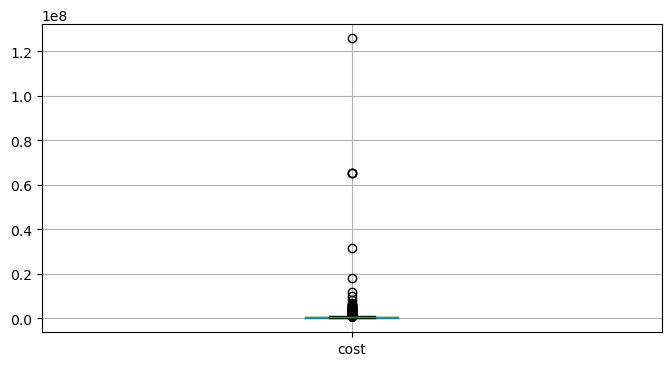

In [393]:
plt.figure(figsize=(8,4))
somon.boxplot(column='cost')
plt.show()

In [395]:
somon.cost.sort_values(ascending=True)

5236             1
10255            1
7618             1
3167             1
3177             1
           ...    
2945      31500000
4978      65265000
5063      65265000
6820      65265000
7704     125902260
Name: cost, Length: 10353, dtype: int64

In [412]:
list(somon.cost.nsmallest(500))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 10,
 20,
 20,
 20,
 23,
 25,
 26,
 30,
 32,
 35,
 38,
 38,
 40,
 45,
 46,
 50,
 53,
 55,
 55,
 60,
 60,
 67,
 100,
 115,
 120,
 120,
 145,
 150,
 150,
 155,
 155,
 170,
 175,
 180,
 185,
 185,
 190,
 200,
 200,
 200,
 200,
 200,
 215,
 220,
 230,
 247,
 250,
 250,
 260,
 275,
 280,
 300,
 300,
 300,
 310,
 310,
 310,
 315,
 315,
 340,
 344,
 350,
 350,
 355,
 360,
 365,
 375,
 400,
 400,
 420,
 430,
 450,
 450,
 450,
 460,
 470,
 500,
 500,
 500,
 530,
 550,
 600,
 600,
 600,
 630,
 699,
 750,
 790,
 900,
 900,
 900,
 960,
 1000,
 1000,
 1200,
 1200,
 1200,
 1200,
 1300,
 1400,
 1400,
 1500,
 1600,
 1600,
 1650,
 1700,
 1700,
 1850,
 2000,
 2000,
 2400,
 2500,
 2500,
 2500,
 2500,
 2500,
 2700,
 3000,
 3000,
 3200,
 3333,
 3750,
 4000,
 4000,
 4500,
 4500,
 4750,
 4790,
 5071,
 5500,
 6000,
 6600,
 8500,
 10000,
 11500,
 12000,
 12500,
 15000,
 16000,
 16500,
 16550,
 17000,
 18000,

In [413]:
somon.head()

,city,floor,area,location,cost,flat_room_numb
0,1,3,85.00,4,350000,3
1,2,3,81.00,8,450000,4
2,2,1,85.00,8,470000,4
3,2,1,85.00,8,47000,4
4,2,2,43.00,13,245000,1


In [419]:
somon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10353 entries, 0 to 10354
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            10353 non-null  int64  
 1   floor           10353 non-null  int64  
 2   area            10353 non-null  float64
 3   location        10353 non-null  int64  
 4   cost            10353 non-null  int64  
 5   flat_room_numb  10353 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 824.2 KB


In [418]:
somon['location'] = somon['location'].astype('int64')

In [420]:
somon.to_excel('Somontj_clean.xlsx')